In [1]:
!pip install tensorflow
!pip install --upgrade tensorflow


In [5]:
!pip install keras
!pip install keras tensorflow


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
    


In [38]:
# Replace 'absolute_path' with the actual absolute path to your dataset folder
absolute_path = r"C:\Users\manch\OneDrive\Desktop\cat and dog\dogs_vs_cats"

# Set the paths for the training and testing datasets
# Set the paths for the training and testing datasets
train_path = r"C:\Users\manch\OneDrive\Desktop\cat and dog\dogs_vs_cats\train"
test_path = r"C:\Users\manch\OneDrive\Desktop\cat and dog\dogs_vs_cats\test"


In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your training dataset
train_path = r"C:\Users\manch\OneDrive\Desktop\cat and dog\dogs_vs_cats\train"

# Create an ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size
batch_size = 32

# Generate the training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary'
)

# Get the training data and labels
X_train, Y_train = train_generator.next()

# Reshape the training data
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train))

# Normalize pixel values
X_train = X_train/255.0


Found 20000 images belonging to 2 classes.


In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your training dataset
test_path = r"C:\Users\manch\OneDrive\Desktop\cat and dog\dogs_vs_cats\test"

# Create an ImageDataGenerator for data preprocessing
testn_datagen = ImageDataGenerator(rescale=1./255)

# Set batch size
batch_size = 32

# Generate the training dataset
train_generator = train_datagen.flow_from_directory(
    test_path,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary'
)

# Get the training data and labels
X_train, Y_train = train_generator.next()

# Reshape the training data
X_test = X_train.reshape(len(X_train), 100, 100, 3)
Y_test = Y_train.reshape(len(Y_train))

# Normalize pixel values
X_train = X_train/255.0


Found 5000 images belonging to 2 classes.


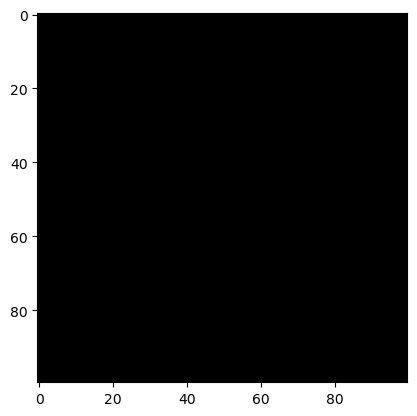

In [41]:
import random
import matplotlib.pyplot as plt
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()



In [42]:
# model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


### from tensorflow import keras

opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Assuming X_train and Y_train are your training data and labels
# Make sure Y_train is a 1D array or column vector

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Now you can train your model
model.fit(X_train, Y_train, epochs=5, batch_size=64)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6932 - accuracy: 0.5312
Epoch 2/5
1/1 [==============================] - 0s 65ms/step - loss: 0.6931 - accuracy: 0.5312
Epoch 3/5
1/1 [==============================] - 0s 67ms/step - loss: 0.6931 - accuracy: 0.5312
Epoch 4/5
1/1 [==============================] - 0s 67ms/step - loss: 0.6931 - accuracy: 0.5312
Epoch 5/5
1/1 [==============================] - 0s 63ms/step - loss: 0.6930 - accuracy: 0.5312


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Assuming X_train and Y_train are your training data and labels
# Make sure Y_train is a 1D array or column vector

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Now you can train your model
model.fit(X_train, Y_train, epochs=5, batch_size=64)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6931 - accuracy: 0.6250
Epoch 2/5
1/1 [==============================] - 0s 64ms/step - loss: 0.6931 - accuracy: 0.5312
Epoch 3/5
1/1 [==============================] - 0s 75ms/step - loss: 0.6931 - accuracy: 0.5312
Epoch 4/5
1/1 [==============================] - 0s 52ms/step - loss: 0.6930 - accuracy: 0.5312
Epoch 5/5
1/1 [==============================] - 0s 64ms/step - loss: 0.6930 - accuracy: 0.5312


In [54]:
# Assuming you have already trained and compiled your model
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Assuming X_test and Y_test are your testing data and labels
evaluation_result = model.evaluate(X_test, Y_test)

# Print the evaluation results
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])


1/1 [==============================] - 0s 260ms/step - loss: 0.6975 - accuracy: 0.5312
Test Loss: 0.6975221037864685
Test Accuracy: 0.53125


In [46]:
#making predictions

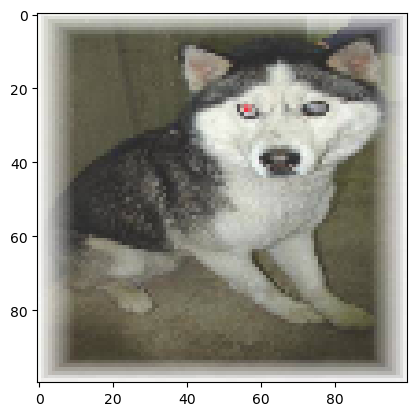

1/1 [==============================] - 0s 126ms/step
Our model says it is: dog


In [55]:
import random
import matplotlib.pyplot as plt

# Assuming you have already trained and compiled your model
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Select a random index from the test set
idx2 = random.randint(0, len(Y_test))

# Display the selected image
plt.imshow(X_test[idx2, :])
plt.show()

# Make a prediction on the selected image
Y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
prediction = (Y_pred > 0.5).astype(int)

# Convert the binary prediction to a label
if prediction == 0:
    pred_label = 'dog'
else:
    pred_label = 'cat'

# Print the prediction
print("Our model says it is:", pred_label)

